In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-stiffness-oregon)

In {numref}`Example {number} <example-stiffness-oregon>` we derived a Jacobian matrix for the Oregonator model. Here is a numerical solution of the ODE.

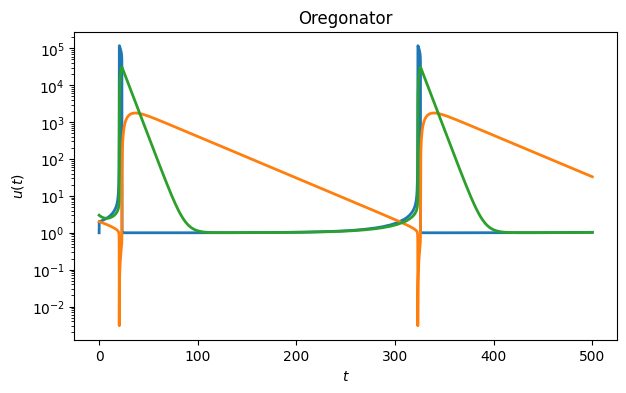

In [2]:
from scipy.integrate import solve_ivp
q, s, w = (8.375e-6, 77.27, 0.161)

def ode(t, u):
    return array(
        [
            s * (u[1] - u[0] * u[1] + u[0] - q * u[0]**2),
            (-u[1] - u[0] * u[1] + u[2]) / s,
            w * (u[0] - u[2]),
        ]
    )

u0 = array([1.0, 2.0, 3.0])
tspan = (0, 500)
start = timer()
sol = solve_ivp(ode, tspan, u0, method="BDF")
semilogy(sol.t, sol.y.T)
xlabel("$t$"),  ylabel("$u(t)$")
title("Oregonator");

At each value of the numerical solution, we can compute the eigenvalues of the Jacobian. Here we plot all of those eigenvalues in the complex plane.

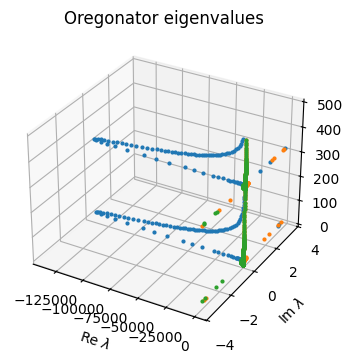

In [3]:
J = lambda u: array(
    [
        [-s * (u[1] + 1 - 2 * q * u[0]), s * (1 - u[0]), 0],
        [-u[1] / s, (-1 - u[0]) / s, 1 / s],
        [w, 0, -w],
    ]
)

from scipy.linalg import eigvals

lamb = array([eigvals(J(u)) for u in sol.y.T])
ax = figure().add_subplot(projection='3d')
for i in range(3):
    ax.plot(real(lamb[:, i]), imag(lamb[:, i]), sol.t, ".")
ax.set_xlabel("Re $\\lambda$")
ax.set_ylabel("Im $\\lambda$")
ax.set_zlabel("$t$")
ax.set_title("Oregonator eigenvalues");

You can see that there is one eigenvalue that ranges over a wide portion of the negative real axis and dominates stability considerations.